# Fjerdeordens Runge-Kutta-metoden for løsning av differensialligninger

### TFY4163 Fluidmekanikk og bølgefysikk – Programmeringsøving 3 Løsningsforslag

**Forkunnskaper:** Euler-Cromer metoden, bruk av `scipy.integrate.solve_ivp` funksjonen fra SciPy biblioteket. Les gjennom introduksjon til Runge-Kutta metoden.  

**Læringsmål:** Implementere fjerdeordens Runge-Kutta metoden, og utføre konvergenstest.

--------

## Oppgave 1 –  Sammenligning av RK5(4) metoden og Euler-Cromer metoden

I programmeringsøving 2 ble løsning av bevegelsesligningen for en enkel harmonisk pendel ved RK5(4)-metoden implementert ved å bruke `scipy.integrate.solve_ivp` funksjonen. Vi skal igjen se på enkel harmonisk pendelbevegelse. Bruk følgende initialverdier og parametre:

- Lengden av snora, $l = 1.0$ m
- Masse, $m = 5$ kg
- Tyngdeakselerasjonen, $g = 9.8 \: \text{m}/\text{s}^2$ 
- Startvinkel til snora med hensyn til vertikalen, $\theta_0 = 0.2$ rad
- Vinkelhastighetens startverdi, $\dot{\theta}_0 = 0.0$ rad/s

$\textbf{a)}$ Plot vinkelutslaget, $\theta$, som funksjon av tid, $t$, med tidssteg $\Delta t = 0.1$ s både for Euler-Cromer metoden og RK5(4) metoden, sammen med den analytiske løsningen av ligningen. Plott opp til $t=20$ s. Den analytiske løsningen er $\theta(t) = \theta_0 \cos(\omega_0 t)$, med $\omega_0 = \sqrt{g/l}$. Du vil observere at RK5(4) metoden gir en løsning nærmere den analytiske enn Euler-Cromer metoden. Dette er fordi Euler-Cromer metoden er en første ordens metode, mens RK5(4) er en høyere ordens metode.

*Merk:* Noe av koden du trenger for å løse denne oppgaven er gitt under, men du kan også bruke koden du selv skrev i programmeringsøving 2 (gitt at den fungerer som forventet). 

Average Timestep RK45: 1.0e-01


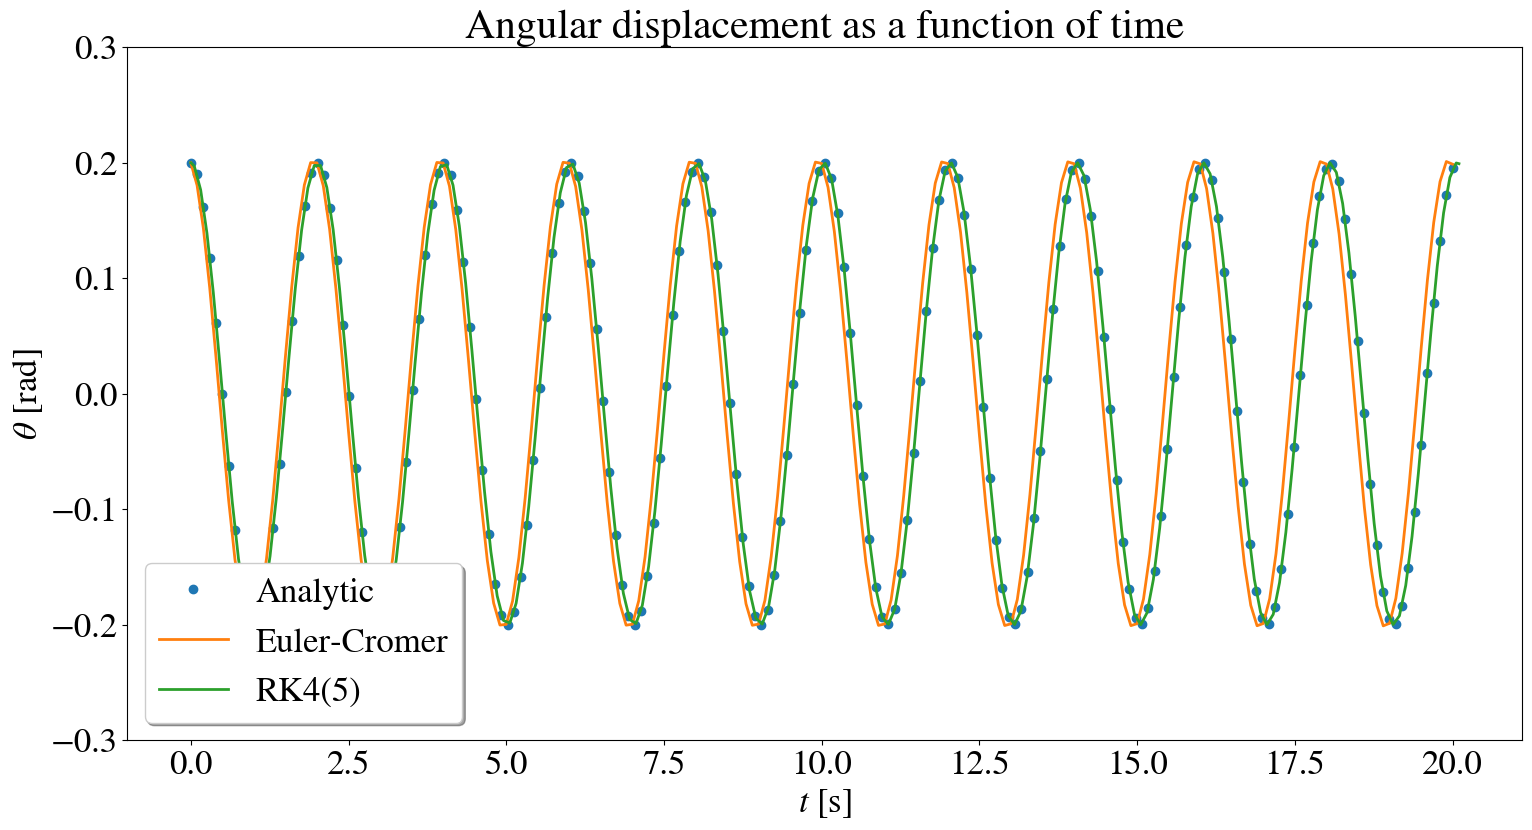

In [1]:
import numpy as np                # Importing numpy as np
import matplotlib.pyplot as plt   # Importing matplotlib.pyplot for plotting 
from scipy import integrate       # Importing integrate package from SciPy


%matplotlib inline

newparams = {'figure.figsize': (18, 9), 'axes.grid': False,
             'lines.linewidth': 2,
             'font.size': 25, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral'}
# figure.figsize sets the size of the figure (values are in inches)
# axes.grid, set to False means that there is no grid
# lines.linewidth sets the thickness of the lines in the plot
# font.size sets the size of the text (ticks, title, xlabel, etc.)
# mathtext.fontset sets the font of the text of the type r'$tekst$' (math text)
# font.family sets the font of ordinary text (ticks, title, xlabel, etc.)

# There are several other parameters you can change, and you can look them up in the documentation 
# for matplotlib if you need to change any. 

plt.rcParams.update(newparams) # Updates the parametere set above. 

def euler_cromer_approx(theta_0, theta_dot_0, dt, T):
    """
    Calculates angular displacement and angular velocity 
    using the Euler-Cromer method 
    """
    N = int(T/dt)
    t = np.linspace(0, T, N + 1)
    theta, w = np.zeros(N+1), np.zeros(N+1)
    theta[0], w[0] = theta_0, theta_dot_0
    for i in range(N):
        w[i+1] = w[i] - g/l*theta[i]*dt
        theta[i+1] = theta[i] + w[i+1]*dt
    return theta, w, t


""" RK5(4) method """
def equation(t, vals):
    """
    Calculates the RHS of the differential equations given an array (vals) which contains the parameters

    Parameters
    -----------
    t: (float) time
    vals: (array) values of theta and omega, [theta, omega] 
    
    Returns
    -------
    array with values of the RHS of the equations.
    """
    dw = -g/l*vals[0]
    dtheta = vals[1]
    return np.array([dtheta, dw])

def RK45_method(RHS, theta_0, theta_dot_0, dt, T):
    """
    Calculates the angular dispacement and angular velocity.
    Note that the parameter RHS is a function representing the right hand side of the differential equations
    """
    init_values = [theta_0, theta_dot_0]
    t_span = [0, T + dt]
    theta12 = integrate.solve_ivp(RHS, t_span, init_values, method = 'RK45', max_step = dt)
    theta = theta12.y[0, :]  # Array of angular displacements
    w = theta12.y[1, :]      # Array of angular velocities 
    t = theta12.t            # Array of times
    return theta, w, t 

# Parameters
m = 5           # [kg], mass
l = 1.0         # [m], length of pendulum string
g = 9.8         # |m/s^2], gravitational acceleration
theta_0 = 0.2   # [rad], initial angle wrt vertical
theta_dot_0 = 0.0       # [rad/s], initial angular velocity  
T = 20          # Final time [s]
dt = 0.1        # Time step [s]

# Analytic solution 
w0 = np.sqrt(g/l)
t_a = np.linspace(0, 20, 200)
theta_a = theta_0*np.cos(w0*t_a)

theta_euler, w_euler, t_euler = euler_cromer_approx(theta_0, theta_dot_0, dt, T)
theta_RK, w_RK, t_RK = RK45_method(equation, theta_0, theta_dot_0, dt, T)

#We also calculate the average timestep for the RK5(4)-method.
#Note that we do not include the first 5 values or the last value, as it takes a few steps for the algorithm to stabilize
print(f"Average Timestep RK45: {(t_RK[-2]-t_RK[5])/t_RK[5:-2].shape[0]:.1e}")

plt.plot(t_a, theta_a, 'o', label='Analytic')
plt.plot(t_euler, theta_euler, label="Euler-Cromer")
plt.plot(t_RK, theta_RK, label="RK4(5)")
plt.xlabel('$t$ [s]')
plt.ylabel(r'$\theta$ [rad]')
plt.ylim(-0.3, 0.3)
plt.legend(shadow=True)
plt.title("Angular displacement as a function of time")
plt.show()

## Oppgave 2 – Konvergenstest for fjerdeordens Runge-Kutta-metoden

Fjerdeordens Runge-Kutta er en fjerdeordens numerisk metode for å løse ordinære differensialligninger. At det er en *fjerde ordens* metode, som vil si at feilen (totalt akkumulert) i verste fall går som $\sim \Delta t^4$. Sammenlignet med f.eks. Euler-Cromer metoden, som er en første ordens metode, hvor feilen går som $\sim \Delta t$, vil vi kunne benytte et større tidssteg og oppnå lik feil. Til gjengjeld krever RK4 tre ekstra funksjonskall per tidssteg, så en høyere ordens metode vil ikke *alltid* være mer effektiv.

**a)** Vi skal nå implementere RK4-metoden for å løse differensialligninger. Du får utgitt kode som beregner ett steg i Runge-Kutta metoden i cella under. Skriv en funksjon som beregner utslagsvinkelen, $\theta$, og vinkelhastigheten, $\omega$, ved Runge-Kutta-metoden.

*Hint:* `RK4_step(theta, w, dt)` regner ut ett steg, så du må benytte en løkke hvor du beregner `n-1` steg for å finne vinkelutslaget.

In [2]:
# GIVEN FUNCTION


def RK4_step(RHS, vals, t, dt):
    """
    Calculates one step of the RK4-algorithm.
    
    RHS: (callable) function representing the right hand side of the differential equations
    vals: (numpy array) previous values of theta and omega, [theta, omega] 
    t: (float) previous time
    dt: (float) timestep
    
    return: (array) next values [theta_next, omega_next]
    """
    k1 = RHS(t, vals)   
    k2 = RHS(t+dt/2, vals+(dt/2)*k1)
    k3 = RHS(t+dt/2, vals+(dt/2)*k2)
    k4 = RHS(t+dt, vals+dt*k3)
    return vals + (dt/6)*(k1 + (2*k2) + (2*k3) + k4)

def RK4_method(RHS, theta_0, theta_dot_0, dt, T):
    """
    Computes theta and w (omega).  
    
    Parameters
    -----------
    k: RHS of equation
    f: RHS of equation
    theta0: initial value of theta
    w0: initail value of omega
    dt: timestep
    
    return theta, w, t
    """
    n = int(float(T)/dt) # number of iterations
    t = np.linspace(0, T, n + 1)
    theta, w = np.zeros(n+1), np.zeros(n+1)
    theta[0], w[0] = theta_0, theta_dot_0
    
    for i in range(n):
        theta[i+1], w[i+1] = RK4_step(RHS, np.array([theta[i], w[i]]), t[i], dt) 
        # Calculates values of theta and omega using RK4-method
        
    return theta, w, t

**b)** Benytt intitialbetingelsene og parametrene gitt tidligere, og plot vinkelutslaget $\theta$ som funksjon av tid, $t$, opp til $t = 20$ s. Bruk tidssteg $\Delta t = 0.01$ s.

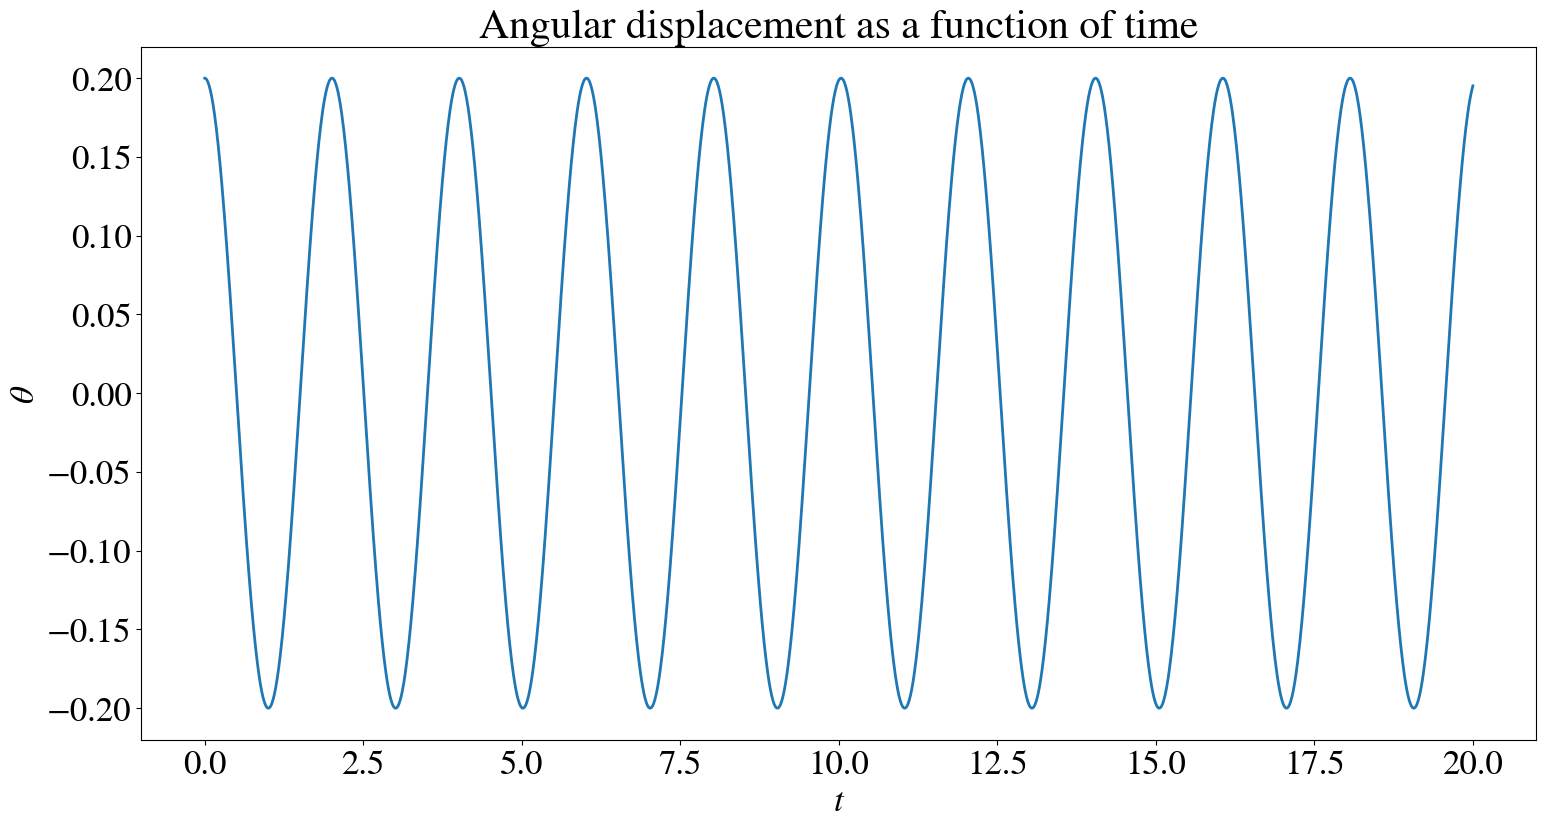

In [3]:
dt = 0.01 # [s], timestep
T = 20    # [s]
theta, w, t = RK4_method(equation, theta_0, theta_dot_0, dt, T)

# Plotting angular displacement

plt.plot(t, theta)
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.title("Angular displacement as a function of time")
plt.show()

**c)** Den totale energien til den enkle harmoniske pendelen er gitt ved (se programmeringsøving 1)

\begin{equation}
 	E = E_k + E_p = \frac{1}{2} m l^2 \omega^2 + \frac{1}{2} mgl\theta^2.
	\label{eq:energy}
\end{equation}

Plot den kinetiske energien, den potensielle energien og total energi som funksjon av tid i samme figur. Bruk fjerde-ordens Runge-Kutta metoden med tidssteg $\Delta t = 0.01$ s. 

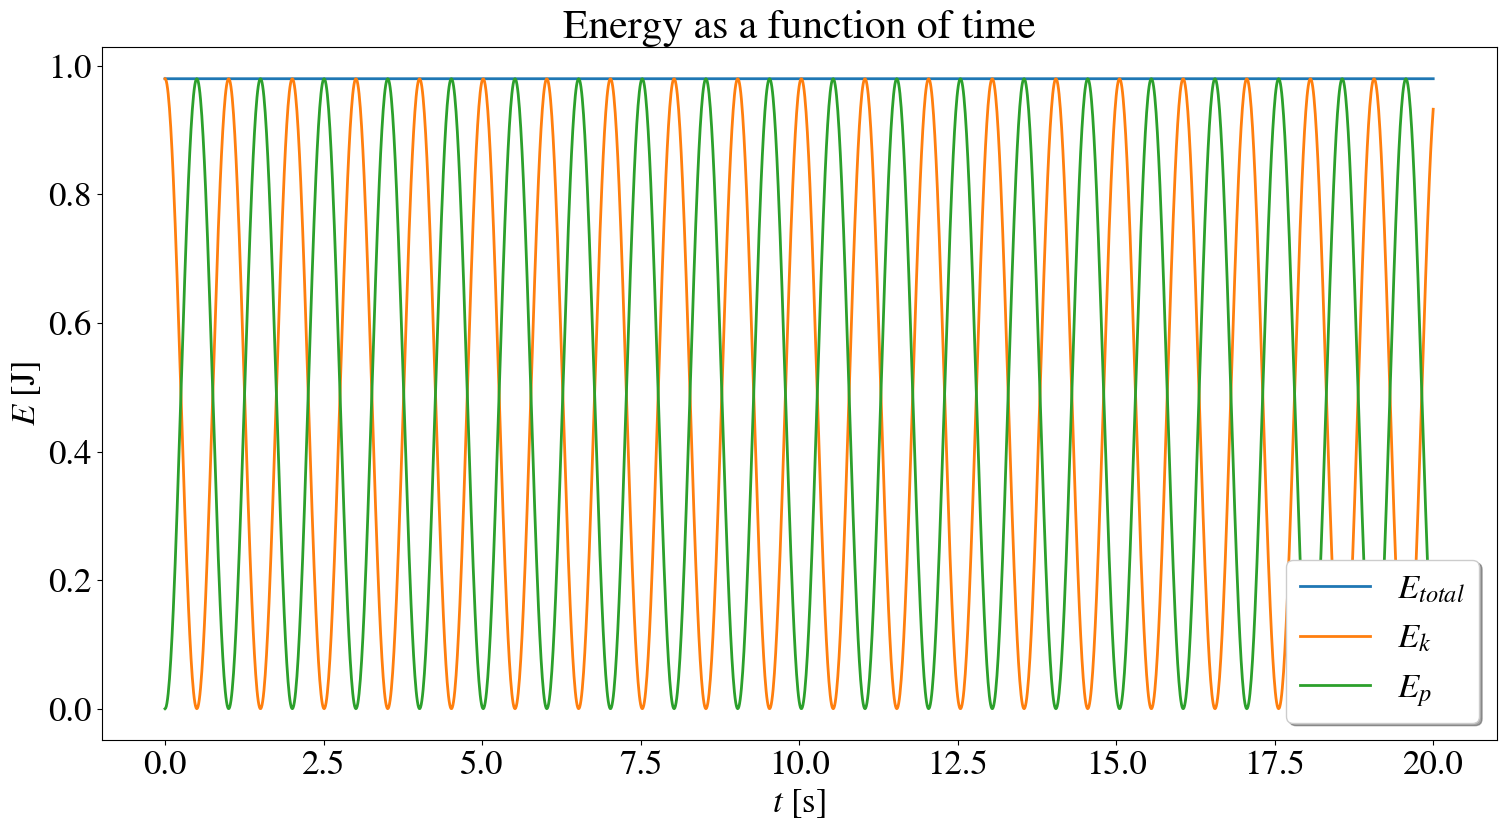

In [4]:
def E_k(theta):
    """ Calculates kinetic energy """
    return 1/2*m*g*l*theta**2

def E_p(w):
    """ Calculates gravitational potential energy """
    return 1/2*m*l**2*w**2

def total_energy(theta, w):
    """ Calculates total energy """
    return E_k(theta) + E_p(w)

dt = 0.01 # [s], timestep
T = 20

theta, w, t = RK4_method(equation, theta_0, theta_dot_0, dt, T)

E_total = total_energy(theta, w)
E_kinetic = E_k(theta)
E_potential = E_p(w)
plt.plot(t, E_total, label=r'$E_{total}$')
plt.plot(t, E_kinetic, label=r'$E_{k}$')
plt.plot(t, E_potential, label=r'$E_{p}$')
plt.xlabel(r'$t$ [s]')
plt.ylabel(r'$E$ [J]')
plt.title('Energy as a function of time')
plt.legend(loc = 4, shadow = True)
plt.show()

**d)** Vi skal nå utføre *konvergenstest*. Vi vet at for å ha en fysisk løsning på systemet, må energien være konstant. Dette kan vi bruke for å finne et kvantitativt mål på nøyaktigheten til de numeriske metodene for ulike tidssteg. Altså, vi kan derfor beregne hvor mye energien har endret seg fra starten til slutten av tidsintervallet, for hvert tidssteg.

Utfør en konvergenstest av RK4 ved å skrive en funksjon som beregner energidifferansen mellom start- og sluttid. Her lønner det seg å bruke logaritmisk fordelte verdier for tidsstegene, her kan numpy-funksjonene `logspace` eller `geomspace` være nyttige. Velg $10$ tidssteg mellom $\Delta t_\text{start} = 0.001$ s og $\Delta t_\text{slutt} = 0.1$ s. Plot resultatet med tidssteget $\Delta t$ på $x$-aksen og energidifferansen $\Delta_E = |E(t=t_\mathrm{max}) - E(t=0)|$ på $y$-aksen. Bruk gjerne logaritmiske akser, det kan gjøre det lettere å tolke resultatene. (Utfør gjerne konvergensten for de andre numeriske metodene også.)

*Hint:* Lag en for-løkke som itererer over $\Delta t$ verdiene, og kjører `RK4_method`-funksjonen for hvert tidssteg.

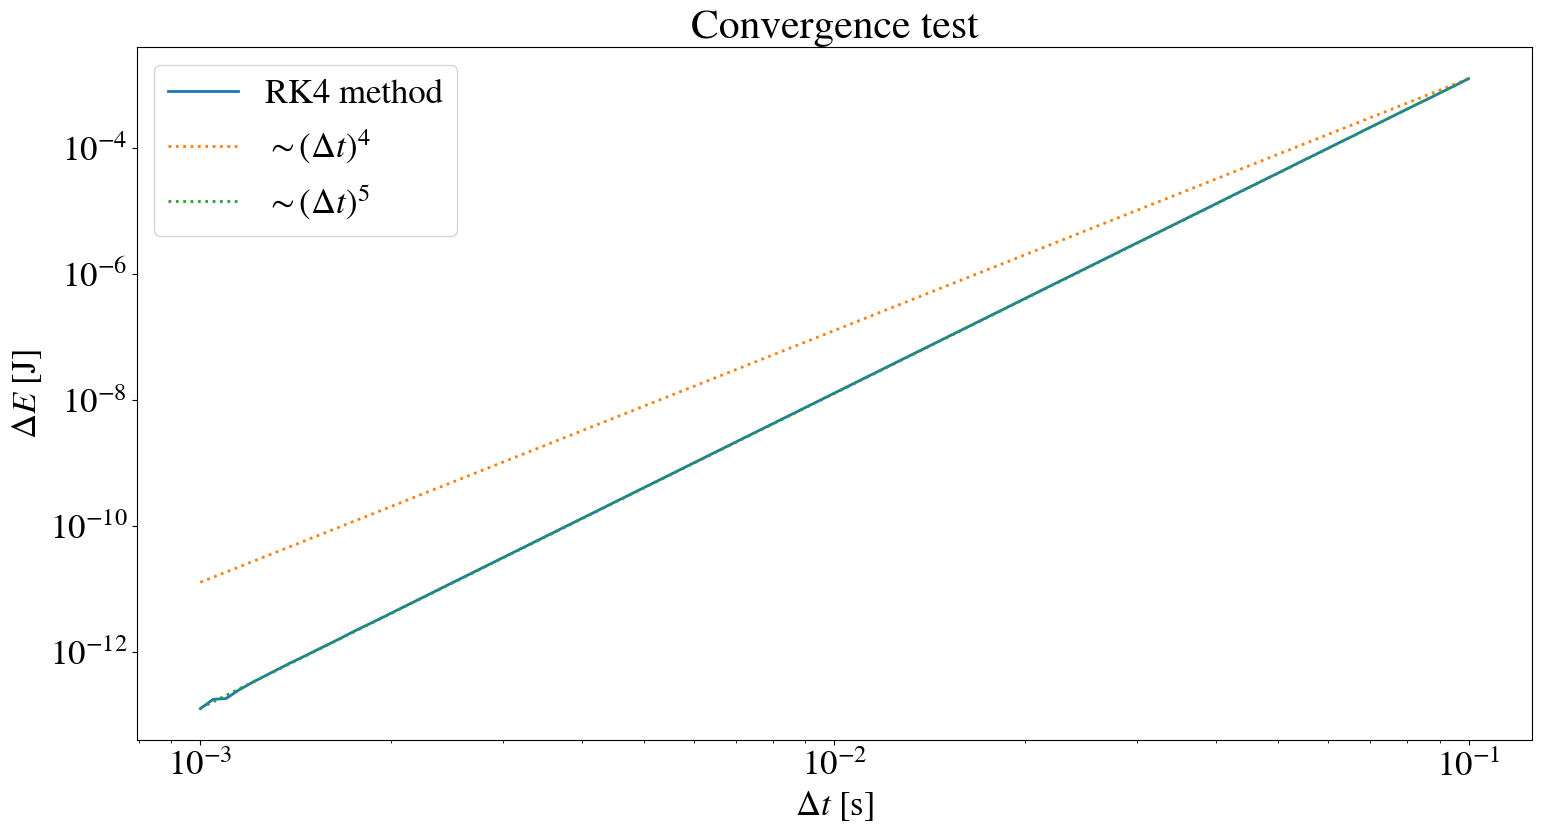

In [5]:
def convergence_test_energy_RK4():
    T = 10
    N=100
    dt_min = 0.001
    dt_max = 0.1
    dt_array = np.geomspace(dt_min, dt_max, N) 
    #Creates array with values from dt_min to dt_max, with step_difference as value between two elements.
    diff_array = np.empty(N) # Creates an empty (unfilled) array of the same size as dt to store data
    
    for j in range(N):
        theta, w, t = RK4_method(equation, theta_0, theta_dot_0, dt_array[j], T) # Calculates theta, w and t for the current element
        E_total = total_energy(theta, w) # Calculates total energy
        diff_array[j] = np.abs(E_total[-1] - E_total[0])  # absolute value of energy difference between end and start
        
    return diff_array, dt_array

diff_RK4, dt_RK4 = convergence_test_energy_RK4()

h5 = diff_RK4[-1]*(dt_RK4/dt_RK4[-1])**5 # Included to show that the error is proportional to dt^4
h4 = diff_RK4[-1]*(dt_RK4/dt_RK4[-1])**4 # Included to show that the error is proportional to dt^4

plt.loglog(dt_RK4, diff_RK4, label = 'RK4 method')
plt.loglog(dt_RK4, h4, ':', label=r'$\sim (\Delta t)^4$')
plt.loglog(dt_RK4, h5, ':', label=r'$\sim (\Delta t)^5$')

plt.legend()
plt.xlabel(r'$\Delta t$ [s]')
plt.ylabel(r'$\Delta E$ [J]')
plt.title('Convergence test')
plt.show()


## Ekstraoppgave (frivillig) – Flyttall-feil

Flyttall-feil oppstår når datamaskiner ikke klarer å representere tall med stor nok presisjon. Dette skjer blant annet fordi datamaskiner bruker et binært tallsystem (med 0 og 1). Selv om vi som regel ikke har behov for å tenke mye på flyttall-feil, kan de oppstå når du minst venter det. F.eks. når du trekker store og små tall fra hverandre i Python, eller hvis du prøver å representere et irrasjonelt tall eller tall med "uendelig" mange desimaler på en datamaskin. Et eksempel er $\pi$, som ikke kan representeres helt nøyaktig, selv med all lagringskapasitet i universet. 

### Frivillig arbeidskrav:

- Bruk Numpy og lag en variabel `sin_val` som er lik $\sin(2\pi)$ og en variabel kalt `cos_val` som er lik $\cos(2\pi)$.
- Print `sin_val` minus `cos_val`. Hva er svaret? Er det det du forventer?
- Lag en ny variabel som heter `sin_n_cos` som er lik $\sin(0) - \cos(0)$.
- Print `sin_n_cos`. Er dette resultatet som du forventer? Er det det samme som for `sin_val` minus `cos_val`?
- Print `sin_n_cos` minus `sin_val` pluss `cos_val`. Får du null som svar?
- Vis at $\sin(x)/(1 + \cos(x)) = (1 - \cos(x))/\sin(x)$.
- Lag to funksjoner `trig1` og `trig2` som regner ut $\sin(x)/(1 + \cos(x))$ og $(1 - \cos(x))/\sin(x)$.
- Plot `trig1` minus `trig2` for 100 verdier mellom 2 og 4. Er resultatet 0 for alle verdier mellom 2 og 4?
- Plot `trig1` for de samme verdiene som brukt ovenfor. Ser du noen likhet mellom `trig1` og `trig1` minus `trig2`?

In [ ]:
import numpy as np 

sin_val = np.sin(2*np.pi)
cos_val = np.cos(2*np.pi)
print(sin_val - cos_val)
sin_n_cos = np.sin(0) - np.cos(0)
print(sin_n_cos)
print(sin_n_cos - sin_val + cos_val)



In [ ]:
def trig1(x):
    return (1 - np.cos(x))/np.sin(x)

def trig2(x):
    return np.sin(x)/(1 + np.cos(x))


lst = np.linspace(2, 4, 100)

import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(0)
plt.plot(lst, trig1(lst) - trig2(lst))
plt.xlabel('x values', fontsize=16)
plt.ylabel('trig1(x) - trig2(x)', fontsize=16)
plt.show()

plt.figure(1)
plt.plot(lst, trig1(lst))
plt.xlabel('x values', fontsize=16)
plt.ylabel('trig1(x)', fontsize=16)
plt.show()